In [147]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [148]:
base_df = pd.read_csv('data/clean_frame.csv', index_col='ind')
base_df

Код_группы  Год_Поступления  Пособие  Общежитие  Наличие_Матери  \
ind                                                                      
0           16019             2015      0.0        0.0               0   
1           14895             2010      0.0        0.0               1   
2           20103             2017      0.0        0.0               1   
3           19838             2017      0.0        0.0               1   
4           19803             2017      0.0        0.0               1   
...           ...              ...      ...        ...             ...   
13579       17593             2016      0.0        0.0               1   
13580       19433             2015      0.0        1.0               0   
13581       18723             2016      0.0        0.0               1   
13582       14663             2012      0.0        0.0               1   
13583       19869             2017      0.0        1.0               1   

       Наличие_Отца  Опекунство  Село  Иностранец  КодФакультета  Статус  \
ind                                                                        
0               0.0         0.0   0.0         0.0           41.0       3   
1               1.0         0.0   0.0         0.0           28.0       4   
2               1.0         0.0   0.0         0.0           41.0       4   
3               1.0         0.0   0.0         0.0           35.0       4   
4               1.0         0.0   0.0         0.0           28.0       4   
...             ...         ...   ...         ...            ...     ...   
13579           1.0         0.0   0.0         0.0           34.0       3   
13580           0.0         0.0   0.0         0.0           26.0       4   
13581           1.0         0.0   0.0         0.0           41.0       4   
13582           1.0         0.0   0.0         0.0           24.0       4   
13583           1.0         0.0   0.0         0.0           27.0       4   

       male  female  birth_year_int  basis  language  country  region  city  \
ind                                                                           
0         0       1            1998      2         1        8      14    74   
1         1       0            1992      4         0        8      14    74   
2         0       1            1999      1         1        8      14    31   
3         0       1            1994      0         1        8      14  1310   
4         0       1            1995      0         1        8      14  1310   
...     ...     ...             ...    ...       ...      ...     ...   ...   
13579     1       0            1998      2         1        8      14    70   
13580     0       1            1997      2         2        8      14  1310   
13581     1       0            1998      3         1        8      14    70   
13582     0       1            1995      2         0        8       0     1   
13583     0       1            1995      0         1        8      14   965   

       parents_country  
ind                     
0                   10  
1                   10  
2                   10  
3                   10  
4                   10  
...                ...  
13579               10  
13580               10  
13581               10  
13582               10  
13583               10  

[13584 rows x 20 columns]

In [174]:
# Создание тренировочного и тестового датафремов

train, test = train_test_split(base_df, test_size=0.2)

In [176]:
train_input = train.drop('Статус', axis=1)
train_output = train['Статус']
train_output


ind
12663    4
6904     3
1713     3
11329    3
4853     4
        ..
12743   -1
10020    3
6147     3
8624     4
9523     4
Name: Статус, Length: 10867, dtype: int64

In [165]:
test_input

Год_Поступления  male  basis
ind                                
11253             2013     0      3
9332              2015     0      0
6081              2013     0      3
3869              2016     1      3
9715              2019     1      2
...                ...   ...    ...
10082             2014     0      3
2311              2014     1      2
465               2013     0      2
11695             2016     0      3
4912              2016     1      1

[2717 rows x 3 columns]

In [177]:
test_input = test.drop('Статус', axis=1)
test_output = test['Статус']
test_output

ind
13133    3
7592     4
3056     4
9359     4
4278     3
        ..
3040     4
2555     3
8488     4
12134    4
6789     3
Name: Статус, Length: 2717, dtype: int64

In [183]:
class NeuralNetwork():
    def __init__(self, ):
        self.inputSize = 19
        self.outputSize = 1
        self.hiddenSize = 3

        self.W1 = np.random.rand(self.inputSize, self.hiddenSize)
        self.W2 = np.random.rand(self.hiddenSize, self.outputSize)
        self.limit = 0.5

        self.error_list = []
        self.true_positives = 0
        self.false_positives = 0
        self.true_negatives = 0
        self.false_negatives = 0

    def forward(self, X):  
        print(X)
        print(self.W1)      
        self.z = np.matmul(X, self.W1)
        self.z2 = self.sigmoid(self.z)
        self.z3 = np.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3)
        return o

    def sigmoid(self, s):
        return 1 / (1 + np.exp(-s))

    def sigmoidPrime(self, s):
        return s * (1 - s)

    def backward(self, X, y, o):
        #print(o)
        #print(y)
        self.o_error = y - o
        #print(self.o_error)
        self.o_delta = self.o_error * self.sigmoidPrime(o)
        #print(np.matrix.transpose(self.W2))
        #print(self.o_delta)
        self.z2_error = np.matmul(self.o_delta, np.matrix.transpose(self.W2))
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        self.W1 += np.matmul(np.matrix.transpose(X), self.z2_delta)
        self.W2 += np.matmul(np.matrix.transpose(self.z2), self.o_delta)

    def train(self, X, y, epochs):
        for epoch in range(epochs):
            o = self.forward(X)
            self.backward(X, y, o)
            self.error_list.append(np.abs(self.o_error).mean())

    def predict(self, x_predicted):
        return self.forward(x_predicted).item()

    def view_error_development(self):
        plt.plot(range(len(self.error_list)), self.error_list)
        plt.title('Mean Sum Squared Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')

    def test_evaluation(self, input_test, output_test):
        for i, test_element in enumerate(input_test):
            if self.predict(test_element) > self.limit and output_test[i] == 1:
                self.true_positives += 1
            if self.predict(test_element) < self.limit and output_test[i] == 1:
                self.false_negatives += 1
            if self.predict(test_element) > self.limit and output_test[i] == 0:
                self.false_positives += 1
            if self.predict(test_element) < self.limit and output_test[i] == 0:
                self.true_negatives += 1
        print('True positives: ', self.true_positives, '\nTrue negatives: ', self.true_negatives,
              '\nFalse positives: ', self.false_positives, '\nFalse negatives: ', self.false_negatives),
              #'\nAccuracy: ', (self.true_positives + self.true_negatives) /
              #(self.true_positives + self.true_negatives + self.false_positives + self.false_negatives))

In [179]:
input_df = train_input.to_numpy()
input_df

array([[1.9504e+04, 2.0150e+03, 0.0000e+00, ..., 4.0000e+00, 7.8000e+02,
        1.0000e+01],
       [2.0207e+04, 2.0180e+03, 0.0000e+00, ..., 1.4000e+01, 1.3240e+03,
        1.0000e+01],
       [2.0830e+04, 2.0170e+03, 0.0000e+00, ..., 1.4000e+01, 1.3100e+03,
        1.0000e+01],
       ...,
       [1.2200e+04, 2.0120e+03, 0.0000e+00, ..., 0.0000e+00, 1.0000e+00,
        0.0000e+00],
       [1.9913e+04, 2.0170e+03, 0.0000e+00, ..., 1.4000e+01, 1.3100e+03,
        1.0000e+01],
       [1.7112e+04, 2.0130e+03, 0.0000e+00, ..., 1.4000e+01, 7.4000e+01,
        1.0000e+01]])

In [180]:
output = np.ones((1,10867))
output[0] = train_output.astype(np.uint16).to_numpy()
fg = output.reshape(10867,1)
fg

array([[4.],
       [3.],
       [3.],
       ...,
       [3.],
       [4.],
       [4.]])

In [181]:
test = np.ones((1,2717))
test[0] = test_output.astype(np.uint16).to_numpy()
tg = test.reshape(2717,1)
tg

array([[3.],
       [4.],
       [4.],
       ...,
       [4.],
       [4.],
       [3.]])

[[1.9504e+04 2.0150e+03 0.0000e+00 ... 4.0000e+00 7.8000e+02 1.0000e+01]
 [2.0207e+04 2.0180e+03 0.0000e+00 ... 1.4000e+01 1.3240e+03 1.0000e+01]
 [2.0830e+04 2.0170e+03 0.0000e+00 ... 1.4000e+01 1.3100e+03 1.0000e+01]
 ...
 [1.2200e+04 2.0120e+03 0.0000e+00 ... 0.0000e+00 1.0000e+00 0.0000e+00]
 [1.9913e+04 2.0170e+03 0.0000e+00 ... 1.4000e+01 1.3100e+03 1.0000e+01]
 [1.7112e+04 2.0130e+03 0.0000e+00 ... 1.4000e+01 7.4000e+01 1.0000e+01]]
[[0.97859261 0.31600681 0.25890328]
 [0.03134634 0.53998236 0.31543297]
 [0.75208358 0.68646495 0.86026307]
 [0.3131753  0.80193816 0.03865478]
 [0.18685035 0.6913652  0.01117561]
 [0.98699577 0.37200718 0.85636481]
 [0.6649276  0.16207293 0.0474405 ]
 [0.56581414 0.23425456 0.27670837]
 [0.84954711 0.18602449 0.15875834]
 [0.74954561 0.94873522 0.40535278]
 [0.86384783 0.26993732 0.98240578]
 [0.09759804 0.57609708 0.4461393 ]
 [0.26662133 0.32571088 0.63307037]
 [0.05177975 0.6626842  0.19363573]
 [0.70464511 0.5345581  0.6467683 ]
 [0.39433782 0.8

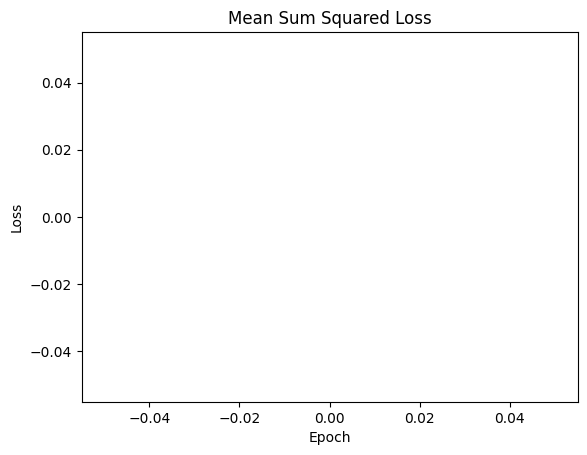

In [185]:
NN = NeuralNetwork()
NN.train(input_df, fg, 200)
#NN.predict(input_pred)
NN.view_error_development()
NN.test_evaluation(test_input.to_numpy(), tg)

3622.3333333333335